In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def exp_func(lmbd, p):
    return -1 / max(lmbd, -0.000001) * np.log(p)

def generate_request_time_exp(lmbd, work_time):
    T_server = [0]
    while True:
        new_t = T_server[-1] + exp_func(lmbd, np.random.rand())
        if new_t > work_time:
            break
        T_server.append(new_t)
    T_server.pop(0)
    return np.asarray(T_server)

def generate_process_time_exp(lmbd, n):
    return exp_func(lmbd, np.random.rand(n))

def simulate(Ts, Tz, work_time, Tw_max):
    last_time = 0
    processed_signals = 0
    processing_time = 0
    free_time = 0
    all_wait_time = []
    for i in range(len(Ts)):
        t_wait = np.random.random() * Tw_max
        if last_time <= Ts[i]:
            free_time += Ts[i] - last_time
            last_time = Ts[i] + Tz[i]
            processing_time += Tz[i]
            processed_signals += 1
        elif Ts[i] + t_wait >= last_time:
            all_wait_time.append(last_time - Ts[i])
            last_time = last_time + Tz[i]
            processing_time += Tz[i]
            processed_signals += 1

        # elif Ts[i] + wait_time <= last_time:
        #     pass

    free_time += max(0, work_time - last_time)
    return processed_signals, free_time, processing_time, all_wait_time

In [13]:
lmbd = 0.7
mu = 0.8
Tw_max = 1
T = 1000

In [14]:
T_req = generate_request_time_exp(lmbd, T)
T_processing = generate_process_time_exp(mu, len(T_req))

processed_requests, T_f, T_p, all_wait_time = simulate(T_req, T_processing, T, Tw_max)
print("============Симуляция============")
print(f"Число обработанных программ: {processed_requests}")
print(f"Число отказов: {len(T_req) - processed_requests}")
print(f"Общее число программ поступивших за заданное вреся моделирования: {len(T_req)}")
print(f"Веросятность обработки: {processed_requests / len(T_req)}")
print(f"Веросятность отказа: {1 - (processed_requests / len(T_req))}")
print(f"Вероятность простоя процессора: {T_f / (T_f + T_p)}")
print(f"Суммарное время ожидания заявок: {np.sum(all_wait_time)}")
print(f"Среднее время ожидания: {np.mean(all_wait_time)}")
print(f"Вероятность загрузки процессора: {T_p / (T_f + T_p)}")


============Симуляция============
Число обработанных программ: 433
Число отказов: 263
Общее число программ поступивших за заданное вреся моделирования: 696
Веросятность обработки: 0.6221264367816092
Веросятность отказа: 0.37787356321839083
Вероятность простоя процессора: 0.46927604210336693
Суммарное время ожидания заявок: 39.699343891462256
Среднее время ожидания: 0.3780889894424977
Вероятность загрузки процессора: 0.5307239578966331


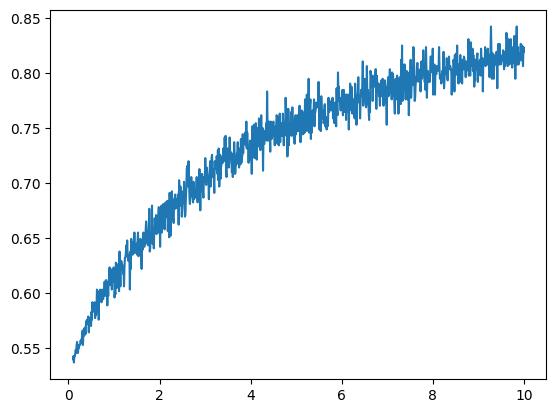

In [15]:
T_req = generate_request_time_exp(lmbd, T)
T_processing = generate_process_time_exp(mu, len(T_req))
all_tw = np.linspace(0.1, 10, 1000)
all_ps = [(simulate(T_req, T_processing, T, tw)[0] / len(T_req)) for tw in all_tw]
plt.plot(all_tw, all_ps)
# plt.xlabel("Интенсивность обработки заявок сервером")
# plt.ylabel("Относительная доля обработанных сигналов")
plt.show()

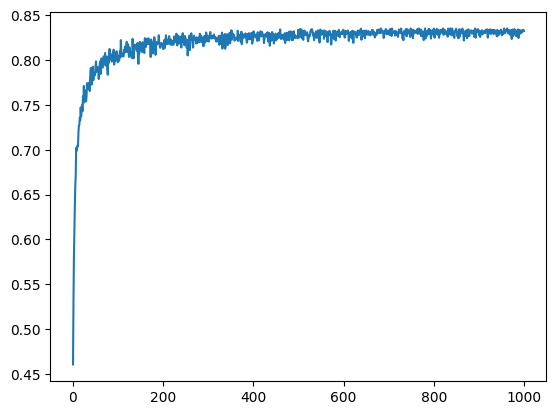

In [22]:
T_req = generate_request_time_exp(lmbd, T)
T_processing = generate_process_time_exp(mu, len(T_req))
all_tw = np.linspace(0.1, 1000, 1000)
all_p_full = []
for tw in all_tw:
    processed_requests, T_f, T_p, all_wait_time = simulate(T_req, T_processing, T, tw)
    all_p_full.append(T_p / (T_f + T_p))

plt.plot(all_tw, all_p_full)
# plt.xlabel("Интенсивность обработки заявок сервером")
# plt.ylabel("Относительная доля обработанных сигналов")
plt.show()

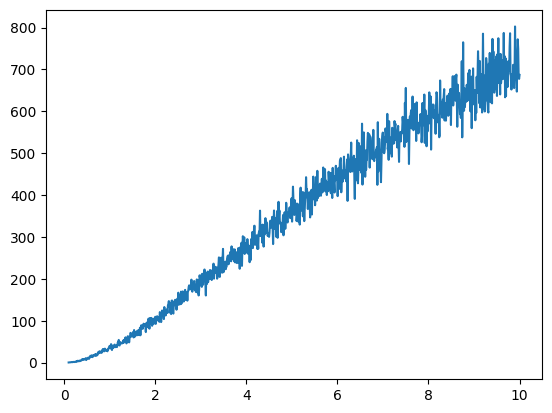

In [18]:
T_req = generate_request_time_exp(lmbd, T)
T_processing = generate_process_time_exp(mu, len(T_req))
all_tw = np.linspace(0.1, 10, 1000)
all_sum_t = []
for tw in all_tw:
    processed_requests, T_p, T_f, all_wait_time = simulate(T_req, T_processing, T, tw)
    all_sum_t.append(np.sum(all_wait_time))

plt.plot(all_tw, all_sum_t)
# plt.xlabel("Интенсивность обработки заявок сервером")
# plt.ylabel("Относительная доля обработанных сигналов")
plt.show()

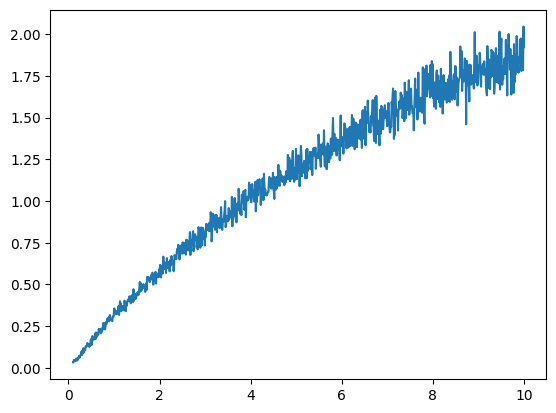

In [40]:
T_req = generate_request_time_exp(lmbd, T)
T_processing = generate_process_time_exp(mu, len(T_req))
all_tw = np.linspace(0.1, 10, 1000)
all_mean_t = []
for tw in all_tw:
    processed_requests, T_p, T_f, all_wait_time = simulate(T_req, T_processing, T, tw)
    all_mean_t.append(np.mean(all_wait_time))

plt.plot(all_tw, all_mean_t)
# plt.xlabel("Интенсивность обработки заявок сервером")
# plt.ylabel("Относительная доля обработанных сигналов")
plt.show()

In [53]:
lmbd2 = 1.5
mu2 = 4
T2 = 1000

======T=========PS=======PFULL=======MEAN_T===
[[0.1989899  0.8011658  0.6910581  0.06324011]
 [0.24848485 0.8146407  0.69094543 0.06969904]
 [0.2979798  0.82845473 0.71267445 0.09139334]
 [0.34747475 0.82173625 0.67975093 0.09345452]
 [0.3969697  0.83355705 0.68236443 0.11145584]
 [0.44646465 0.84253028 0.69435996 0.11488697]
 [0.4959596  0.83354673 0.67755958 0.1261856 ]
 [0.54545455 0.84820847 0.67473207 0.13348737]
 [0.59494949 0.8538874  0.67668618 0.1474638 ]
 [0.64444444 0.85360825 0.67289489 0.15219093]
 [0.69393939 0.88601723 0.66114811 0.16043978]
 [0.74343434 0.88039867 0.67173858 0.17964935]
 [0.79292929 0.89428191 0.67178795 0.16332257]
 [0.84242424 0.87792208 0.65102297 0.17900034]
 [0.89191919 0.88980151 0.65118862 0.18619098]
 [0.94141414 0.90963061 0.67549604 0.18625603]
 [0.99090909 0.8883083  0.64802383 0.2099942 ]
 [1.04040404 0.91349258 0.65857781 0.20374589]
 [1.08989899 0.89118825 0.65625244 0.21058417]
 [1.13939394 0.91382637 0.65107003 0.21760017]
 [1.18888889 

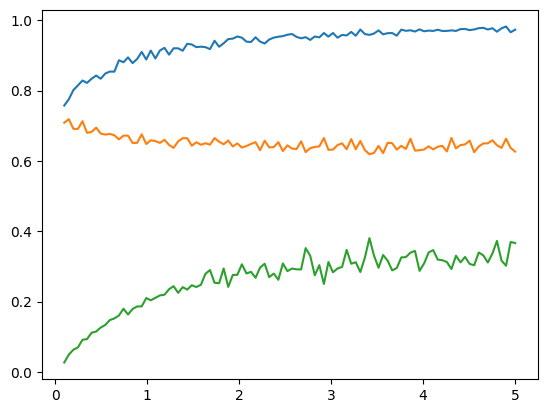

In [63]:
all_tw = np.linspace(0.1, 5, 100)
props = []
all_ps = []
all_p_full = []
all_mean_t = []
for tw in all_tw:
    T_req = generate_request_time_exp(lmbd2, T2)
    T_processing = generate_process_time_exp(mu2, len(T_req))
    processed_requests, T_p, T_f, all_wait_time = simulate(T_req, T_processing, T2, tw)
    ps = processed_requests / len(T_req)
    p_full = T_p / (T_f + T_p)
    mean_t = np.mean(all_wait_time)
    if ps >= 0.8 and p_full >= 0.6 and mean_t <= 0.35:
        props.append([tw, ps, p_full, mean_t])
    all_ps.append(ps)
    all_p_full.append(p_full)
    all_mean_t.append(mean_t)

print("======T=========PS=======PFULL=======MEAN_T===")
print(np.asarray(props))
plt.plot(all_tw, all_ps)
plt.plot(all_tw, all_p_full)
plt.plot(all_tw, all_mean_t)
# plt.xlabel("Интенсивность обработки заявок сервером")
# plt.ylabel("Относительная доля обработанных сигналов")
plt.show()